In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!docker pull nvcr.io/nvidia/tensorflow:19.09-py3

/bin/bash: docker: command not found


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input,Reshape,BatchNormalization
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

Using TensorFlow backend.


In [0]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, ZeroPadding2D,Conv2D,UpSampling2D,Conv2DTranspose,MaxPooling2D,Add,Lambda
from keras.models import Model
import numpy as np
from keras.layers import Input 
from keras.optimizers import SGD ,Adagrad
from keras import layers, models
from keras.utils import plot_model 
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Convolution2D, UpSampling2D
#plot_model(model, to_file='model.png')

In [0]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 192, 3))





58892288/58889256 [==============================] - 1s 0us/step








In [0]:
# Generator
def generator():
  base_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(256, 192, 3))
  base_model.layers.pop()
  #base_model.summary()
  for layer in base_model.layers[:10]:
    layer.trainable = False
  #base_model.summary()
  #decoder
  model = tf.keras.Sequential([base_model])
  model.add(layers.Conv2D(512, kernel_size=3,strides=1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(512, kernel_size=3,strides = 1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(512, kernel_size=3,strides = 1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))

  model.add(layers.UpSampling2D(size=(2, 2)))
  model.add(layers.Conv2D(512, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(512, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(512, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))


  model.add(layers.UpSampling2D(size=(2, 2)))
  model.add(layers.Conv2D(256, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(256, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(256, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))

  model.add(layers.UpSampling2D(size=(2, 2)))
  model.add(layers.Conv2D(128, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(128, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))

  model.add(layers.UpSampling2D(size=(2, 2)))
  model.add(layers.Conv2D(64, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(64, kernel_size=3,strides=1,activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))

  model.add(layers.UpSampling2D(size=(2, 2)))
  model.add(layers.Conv2D(1, kernel_size=1,strides=1,activation='sigmoid'))
  return model

In [0]:
generator = generator()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
def discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(32, kernel_size=1,strides=1, activation='relu', input_shape = (256,192,4)))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(32, kernel_size=1,strides=1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
  
  model.add(layers.Conv2D(64, kernel_size=1,strides=1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(64, kernel_size=1,strides=1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

  model.add(layers.Conv2D(64, kernel_size=1,strides=1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.Conv2D(64, kernel_size=1,strides=1, activation='relu'))
  model.add(layers.ZeroPadding2D(padding=(1, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(100,activation="tanh"))
  model.add(layers.Dense(2,activation='tanh'))
  model.add(layers.Dense(1,activation='sigmoid'))
  return model

In [0]:
'''# Discriminator
def discriminator():
  input_img = Input(shape=(256,192,4))
  
  x = layers.Conv2D(32, kernel_size=1,strides=1, activation='relu')(input_img)
  x = layers.ZeroPadding2D(padding=(1, 1))(x)
  x = layers.Conv2D(32, kernel_size=3,strides = 1, activation='relu')(x)
  x = layers.ZeroPadding2D(padding=(1, 1))(x)
  x = layers.MaxPooling2D(pool_size=(2,2),strides=2)(x)

  x = layers.Conv2D(64, kernel_size=3,strides=1, activation='relu')(x)
  x = layers.ZeroPadding2D(padding=(1, 1))(x)
  x = layers.Conv2D(64, kernel_size=3,strides = 1, activation='relu')(x)
  x = layers.ZeroPadding2D(padding=(1, 1))(x)
  x = layers.MaxPooling2D(pool_size=(2,2),strides=2)(x)

  x = layers.Conv2D(64, kernel_size=3,strides=1, activation='relu')(x)
  x = layers.ZeroPadding2D(padding=(1, 1))(x)
  x = layers.Conv2D(64, kernel_size=3,strides = 1, activation='relu')(x)
  x = layers.ZeroPadding2D(padding=(1, 1))(x)
  x = layers.MaxPooling2D(pool_size=(2,2),strides=2)(x)

  x = layers.Flatten()(x)
  x = layers.Dense(100,activation="tanh")(x)
  x = layers.Dense(2,activation='tanh')(x)
  out = layers.Dense(1,activation='sigmoid')(x)
  discriminator = models.Model(input_img, out)
  return discriminator
'''

'# Discriminator\ndef discriminator():\n  input_img = Input(shape=(256,192,4))\n  \n  x = layers.Conv2D(32, kernel_size=1,strides=1, activation=\'relu\')(input_img)\n  x = layers.ZeroPadding2D(padding=(1, 1))(x)\n  x = layers.Conv2D(32, kernel_size=3,strides = 1, activation=\'relu\')(x)\n  x = layers.ZeroPadding2D(padding=(1, 1))(x)\n  x = layers.MaxPooling2D(pool_size=(2,2),strides=2)(x)\n\n  x = layers.Conv2D(64, kernel_size=3,strides=1, activation=\'relu\')(x)\n  x = layers.ZeroPadding2D(padding=(1, 1))(x)\n  x = layers.Conv2D(64, kernel_size=3,strides = 1, activation=\'relu\')(x)\n  x = layers.ZeroPadding2D(padding=(1, 1))(x)\n  x = layers.MaxPooling2D(pool_size=(2,2),strides=2)(x)\n\n  x = layers.Conv2D(64, kernel_size=3,strides=1, activation=\'relu\')(x)\n  x = layers.ZeroPadding2D(padding=(1, 1))(x)\n  x = layers.Conv2D(64, kernel_size=3,strides = 1, activation=\'relu\')(x)\n  x = layers.ZeroPadding2D(padding=(1, 1))(x)\n  x = layers.MaxPooling2D(pool_size=(2,2),strides=2)(x)\n\

In [0]:
discriminator  = discriminator()

In [0]:
import glob
import cv2
import numpy as np
Train_paths= []
GT_paths =[]
DATASET_FILE = r'/content/drive/My Drive/Train_visual_saliency/testing_data/map/*.png'
Train_path = r'/content/drive/My Drive/Train_visual_saliency/testing_data/image/'
for i in glob.glob(DATASET_FILE):
  b = i
  a = i.split('/')[-1].split('.')[0]
  a = Train_path+a+'.jpg'
  GT_paths.append(b)
  Train_paths.append(a)

train_data = []
y_train = []
import cv2
for i in Train_paths:
  x = cv2.imread(i)
  x = cv2.resize(x, (192, 256),interpolation=cv2.INTER_CUBIC)
  x = np.float32(x)
  train_data.append(x)
for k in GT_paths:
  y = cv2.imread(k,cv2.COLOR_BGR2GRAY)
  if y.shape != None:
    y = cv2.resize(y, (192, 256),interpolation=cv2.INTER_CUBIC)
    y = cv2.normalize(y, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    y = np.expand_dims(y, axis=1)
    image_convert = np.swapaxes(y,1,2)
    y_train.append(image_convert)

In [0]:
x_train = np.array(train_data)
y_train = np.array(y_train)
print(y_train.shape)
x_train.shape

(1000, 256, 192, 1)


(1000, 256, 192, 3)

In [0]:
from keras.losses import binary_crossentropy
#import tf.nn.softmax_cross_entropy_with_logits
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
def bce(a,b):
  return tf.nn.softmax_cross_entropy_with_logits_v2(logits=a,labels=b,axis=0)

In [0]:
a = np.array([[2,3,1],[1,2,3],[1,1,1]]).astype('float32')
b = np.array([[2,1,1],[2,1,2],[1,1,2]]).astype('float32')

In [0]:
a = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]).astype('float32')
b = np.array([0.01, 0.02, 0.75, 0.05, 0.02, 0.1, 0.001, 0.02, 0.009, 0.02]).astype('float32')

In [0]:
sess = tf.Session()
print(sess.run(bce(b,a)))
sess.run(cross_entropy(b,a))

1.6813598


0.6801586

In [0]:
count = 0
for i,j in zip(a,b):
  count += np.log(j)*i

In [0]:
count

-0.28768208622932434

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.reduce_mean(cross_entropy(K.ones_like(real_output), real_output))
    fake_loss = tf.reduce_mean(cross_entropy(K.zeros_like(fake_output), fake_output))
    total_loss = real_loss + fake_loss
    return total_loss

In [0]:
def generator_loss(fake_output, real_image, fake_image):
  a = tf.reduce_mean(cross_entropy(K.ones_like(fake_output), fake_output))
  b = tf.reduce_mean(cross_entropy(real_image, fake_image))
  loss = 0.005*b+a
  return loss

In [0]:
discriminator_optimizer = tf.keras.optimizers.Adagrad(0.0001)
generator_optimizer = tf.keras.optimizers.Adagrad(0.0001)

In [0]:
generator_optimizer = tf.keras.optimizers.Adagrad(0.0001)
discriminator_optimizer = tf.keras.optimizers.Adagrad(0.0001)

In [0]:
def train_step(epoch, images, gt):

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(images,training = True)
      
      real_des = tf.concat([images,gt],3)
      fake_des = tf.concat([images,generated_images],3)
      real_output = discriminator(real_des,training = True)
      fake_output = discriminator(fake_des,training = True)
      
      gen_loss = generator_loss(fake_output,gt,generated_images)
      disc_loss = discriminator_loss(real_output, fake_output)
    
    #print("EPOCH: {} Gen_loss: {}, Desc_loss: {}".format(epoch, gen_loss.eval(session=sess), disc_loss.eval(session=sess)))
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

In [0]:
@tf.function()
def train_step(images, gt,generator= generator, discriminator=discriminator, k = 1, batch_size = 32):
    for _ in range(k):
         with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(images,training=True)
            real_des = tf.concat([images,gt],3)
            fake_des = tf.concat([images,generated_images],3)
            d_x_true = discriminator(real_des) # Trainable?
            d_x_fake = discriminator(fake_des) # dx_of_gx

            d_x_loss = discriminator_loss(d_x_true, d_x_fake)
            # Adjusting Gradient of Discriminator
          gradients_of_discriminator = disc_tape.gradient(d_x_loss, discriminator.trainable_variables)
          discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables)) # Takes a list of gradient and variables pairs
            
              
            g_x_loss = generator_loss(d_x_fake,gt,generated_images)
            # Adjusting Gradient of Generator
            gradients_of_generator = gen_tape.gradient(g_x_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) 
    return g_x_loss, d_x_loss

In [0]:
def train(dataset, epochs, batch_size, total_sample, x_train):
  b = []
  for epoch in range(epochs):
    #start = time.time()
    #print(epoch)
    left_image =total_sample-(total_sample//batch_size)*batch_size
    for i in range(int(total_sample/batch_size)):
      #print("Batch: "+str(i+1))
      X_train = dataset[0][i*batch_size:batch_size*i+batch_size]
      Y_train = dataset[1][i*batch_size:batch_size*i+batch_size]
      g,d = train_step(X_train,Y_train)
      #a.append(g)
      #a.append(d)
    i = i+1
    #print("Batch: "+str(i+1))
    if left_image != 0: 
      X_train = dataset[0][i*batch_size:batch_size*i+left_image]
      Y_train = dataset[1][i*batch_size:batch_size*i+left_image]
      g,d = train_step(X_train,Y_train)
    #a.append(g)
    #a.append(d)
    print("EPOCH: {} -> Gen_loss: {}, Desc_loss: {}".format(epoch, g.eval(session=sess), d.eval(session=sess))) 
    a = []
    a.append(x_train[1])
    a = np.array(a)
    a = generator(a)
    b.append(a[0,:,:,0])
  return b

In [0]:
dataset = [x_train, y_train]
with tf.Session() as sess:
  g_image = []
  init = tf.initialize_all_variables()    
  sess.run(init)
  #ep = []
  a = train(dataset,10, 32,1000, x_train)
  g_image.append(sess.run(a[0]))


NameError: ignored

In [0]:
ep = []
ep.append(train(dataset,10, 32,1000, x_train))

In [0]:
# make batches 
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)

In [0]:
@tf.function()
def training(dataset, epoches):
    for epoch in range(epoches):
          for batch in dataset:
            g,d = train_step(batch[0], batch[1], generator, discriminator ,batch_size = 32, k = 1)
            print("EPOCH: {} -> Gen_loss: {}, Desc_loss: {}".format(epoch, g.eval(session=sess), d.eval(session=sess))) 

         

In [0]:
training(dataset, 1)

In [0]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

In [0]:
@tf.function()
def a(dataset):
  for batch in dataset:
    print(batch[0])
  return


In [0]:
#dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
a(dataset)

Tensor("args_1:0", shape=(?, 256, 192, 3), dtype=float32)


<tf.Operation 'PartitionedFunctionCall_2' type=StatefulPartitionedCall>

In [0]:
iterator = dataset.make_one_shot_iterator()
images, labels = iterator.get_next()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [0]:
iterator

In [0]:
train_data_gen = image_generator.flow_from_directory(directory=,
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(256, 192),
                                                     classes = list(CLASS_NAMES))

In [0]:
sess = tf.Session()

In [0]:
sess.run(ep[0][0])

FailedPreconditionError: ignored

In [0]:
with tf.Session() as sess:
  a1 = sess.run(ep[0][0])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
with tf.Session() as sess:
  a1 = sess.run(ep[0][0])
  a2 = sess.run(ep[0][1])
  a3 = sess.run(ep[0][2])
  a4 = sess.run(ep[0][3])
  a5 = sess.run(ep[0][4])
  a6 = sess.run(ep[0][5])
  a7 = sess.run(ep[0][6])
  a8 = sess.run(ep[0][7])
  a9 = sess.run(ep[0][8])
  a10 = sess.run(ep[0][9])
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
fig.add_subplot(1, 10, 1)
plt.imshow(a1)
fig.add_subplot(1, 10, 2)
plt.imshow(a2)
fig.add_subplot(1, 10, 3)
plt.imshow(a3)
fig.add_subplot(1, 10, 4)
plt.imshow(a4)
fig.add_subplot(1, 10, 5)
plt.imshow(a5)
fig.add_subplot(1, 10, 6)
plt.imshow(a6)
fig.add_subplot(1, 10, 7)
plt.imshow(a6)
fig.add_subplot(1, 10, 8)
plt.imshow(a6)
fig.add_subplot(1, 10, 9)
plt.imshow(a6)
fig.add_subplot(1, 10, 10)
plt.imshow(a10)
plt.show()

FailedPreconditionError: ignored

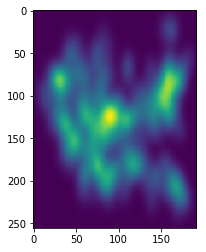

In [0]:
z = y_train[1]
z = z[:,:,0]
plt.imshow(z)

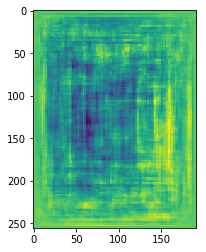

In [0]:
plt.imshow(a1)

In [0]:
a = []
a.append(x_train[1])
a = np.array(a)

In [0]:
a = generator(a,training = False)

In [0]:
a

<tf.Tensor 'sequential_1/conv2d_13/Sigmoid:0' shape=(1, 256, 192, 1) dtype=float32>

In [0]:
a.shape
b = a[0,:,:,0]

In [0]:
init = tf.initialize_all_variables()    
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [0]:
c = b.eval(session=sess)

In [0]:
d = b.eval(session=sess)

In [0]:
for i in ep:
  for j in i:
    print(j.eval(session=sess))

In [0]:
d =c*255

In [0]:
c = d/255

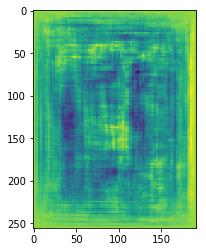

In [0]:
plt.imshow(d)

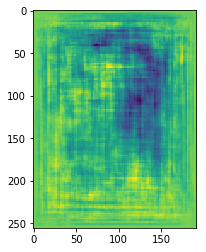

In [0]:
plt.imshow(c)

In [0]:
for i in range(c.shape[0]):
  for j in range(c.shape[1]):
    if(c[i][j]==0.5):
      c[i][j] = 0

In [0]:
c

array([[0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5000017 , ..., 0.4999986 , 0.5       ,
        0.5       ],
       ...,
       [0.5       , 0.5       , 0.50001013, ..., 0.50001466, 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ]], dtype=float32)

In [0]:
c[125][110]

0.5001937

In [0]:
z = y_train[1]

In [0]:
z = z[:,:,0]

In [0]:
z[125][110]

0.63529414

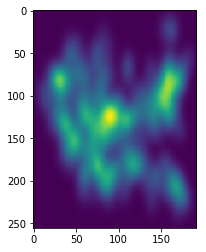

In [0]:
plt.imshow(z)

In [0]:
def build_generator(latent_size):
    # we will map a pair of (z, L), where z is a latent vector and L is a
    # label drawn from P_c, to image space (..., 28, 28, 1)
    cnn = Sequential()

    cnn.add(Dense(3 * 3 * 384, input_dim=latent_size, activation='relu'))
    cnn.add(Reshape((3, 3, 384)))

    # upsample to (7, 7, ...)
    cnn.add(Conv2DTranspose(192, 5, strides=1, padding='valid',
                            activation='relu',
                            kernel_initializer='glorot_normal'))
    cnn.add(BatchNormalization())

    # upsample to (14, 14, ...)
    cnn.add(Conv2DTranspose(96, 5, strides=2, padding='same',
                            activation='relu',
                            kernel_initializer='glorot_normal'))
    cnn.add(BatchNormalization())

    # upsample to (28, 28, ...)
    cnn.add(Conv2DTranspose(1, 5, strides=2, padding='same',
                            activation='tanh',
                            kernel_initializer='glorot_normal'))

    # this is the z space commonly referred to in GAN papers
    latent = Input(shape=(latent_size, ))

    # this will be our label
    image_class = Input(shape=(1,), dtype='int32')

    cls = Embedding(4, latent_size,
                    embeddings_initializer='glorot_normal')(image_class)

    # hadamard product between z-space and a class conditional embedding
    h = layers.multiply([latent, cls])

    fake_image = cnn(h)

    return Model([latent, image_class], fake_image)


In [0]:
a = build_generator(4)

AttributeError: ignored

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input,Reshape,BatchNormalization,Embedding
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

In [0]:
#new model
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
# To generate GIFs
!pip install -q imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [0]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [0]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

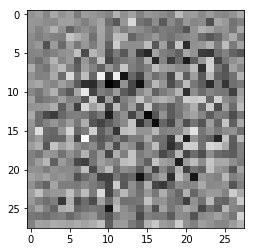

In [0]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [0]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00108509]], shape=(1, 1), dtype=float32)


In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [0]:
EPOCHS = 2
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss


In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [0]:
%%time
train(train_dataset, EPOCHS)

ValueError: ignored

In [0]:
data_file = r'/content/drive/My Drive/Train_visual_saliency/gen_modelWeights0090.npz'
weights = np.load(data_file)

In [0]:
pip install tensorlayer

     |████████████████████████████████| 358kB 2.3MB/s 
     |████████████████████████████████| 2.9MB 42.7MB/s 
     |████████████████████████████████| 6.6MB 30.3MB/s 
     |████████████████████████████████| 24.8MB 20.6MB/s 
     |████████████████████████████████| 3.3MB 27.7MB/s 
  Created wheel for wrapt: filename=wrapt-1.11.1-cp36-cp36m-linux_x86_64.whl size=67442 sha256=141eac2cfaa4181921464d457ebc43e93b94085222aaa59eb9019ed134b925c7
  Stored in directory: /root/.cache/pip/wheels/89/67/41/63cbf0f6ac0a6156588b9587be4db5565f8c6d8ccef98202fc
Successfully built wrapt
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled h5py-2.8.0
  Found existing installation: wrapt 1.11.2
    Uninstal

In [0]:
pip install --upgrade tensorflow-gpu


     |████████████████████████████████| 377.0MB 116kB/s 


In [0]:

import tensorlayer as tl
load_params = tl.files.load_npz(path=data_file, name='model.npz')

RuntimeError: ignored

In [0]:
weights

In [0]:
h5f = h5py.File('data.h5', 'w')

In [0]:
h5f.create_dataset( r'/content/drive/My Drive/Train_visual_saliency/dataset_1', data=weights)

TypeError: ignored